[[-7.87157 -4.86573]
 [-4.76661 -6.87944]
 [-6.67986 -5.8308 ]
 ...
 [ 6.91832 -0.32132]
 [-8.23828 -4.00405]
 [-5.75112 -5.99531]]
3000


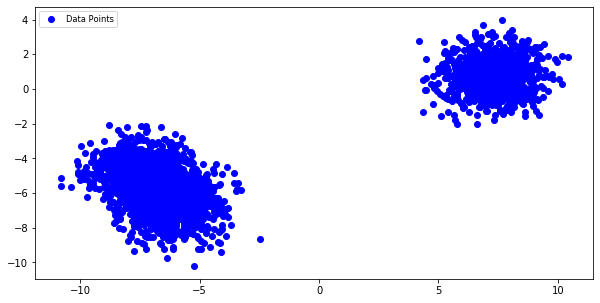

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1)
train_dataset = np.loadtxt('data_k_mean.txt')
print(train_dataset)
length=len(train_dataset)
print(length)
f, ax = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
ax.scatter(train_dataset[:,0],train_dataset[:,1],marker='o',color='b',label='Data Points')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
plt.show()

In [23]:
random.shuffle(train_dataset)
print(train_dataset)

[[-7.87157 -4.86573]
 [-4.76661 -6.87944]
 [-4.76661 -6.87944]
 ...
 [ 6.99423  1.00618]
 [ 8.28209  1.9426 ]
 [ 6.44367  0.35509]]


In [24]:
def dis(a,b):
    return np.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))

In [25]:
def calculate_mean(cluster):
    x_sum=0
    y_sum=0
    for p in cluster:
        x_sum+=train_dataset[p][0]
        y_sum+=train_dataset[p][1]
       
    n=max(1,len(cluster))
    return (x_sum)/n,(y_sum)/n
#####
def get_new_cluster(means,k):
    new=[]
    for i in range(k):
        x=[]
        new.append(x)

    for tp in range(len(train_dataset)):
        mn=100000000000  #distance big value
        nc=-1#new cluster
        for i in range(k):
            d=dis(means[i],train_dataset[tp])
            if(d<mn):
                mn=d#new distance
                nc=i#new cluster  
        new[nc].append(tp)
    return new 
def check(c_old,c_new,k):
    for i in range(k):
        if(len(c_old[i])!=len(c_new[i])):          
            return False
    for i in range(k):
        c_old[i].sort()
        c_new[i].sort()
        for j in range(len(c_old[i])):
            if(c_old[i][j]!=c_new[i][j]):
                return False
    return True                               
def k_means(k):
    ar=[]
    for i in range(k):
        x=[]
        ar.append(x)

        
    for i in range(k):
        ar[i].append(i)    
    prev=ar.copy()  
    while(True):
        means=[]
        for c in range(k):
            means.append(calculate_mean(ar[c]))
        curr=get_new_cluster(means,k)
        if(check(ar,curr,k)):
            break
        ar=curr.copy()
    return curr
K=int(input('Enter a value for K:'))
final_cluster=k_means(K)        
        

Enter a value for K: 2


In [26]:
for i in range(K):
    print(final_cluster[i])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 18, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 33, 34, 36, 37, 41, 42, 43, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 69, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 99, 100, 101, 102, 104, 105, 106, 107, 111, 112, 113, 117, 118, 119, 120, 123, 124, 125, 126, 128, 130, 133, 135, 136, 140, 141, 143, 144, 145, 146, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 188, 189, 191, 192, 195, 196, 197, 198, 199, 200, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 233, 234, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 253, 259, 260, 261, 263, 264, 267, 268, 269, 273, 275, 277, 278, 280, 283, 284, 285, 286, 287, 288, 292, 293, 294, 296, 297, 299, 303, 304, 306, 310, 311, 314, 315, 317, 318, 

In [27]:
x_point=[]
y_point=[]
for i in range(K):#
    x=[]
    y=[]
    x_point.append(x)#
    y_point.append(y)
for i in range(K):
    for x in final_cluster[i]:
        x_point[i].append(train_dataset[x][0])
        y_point[i].append(train_dataset[x][1])

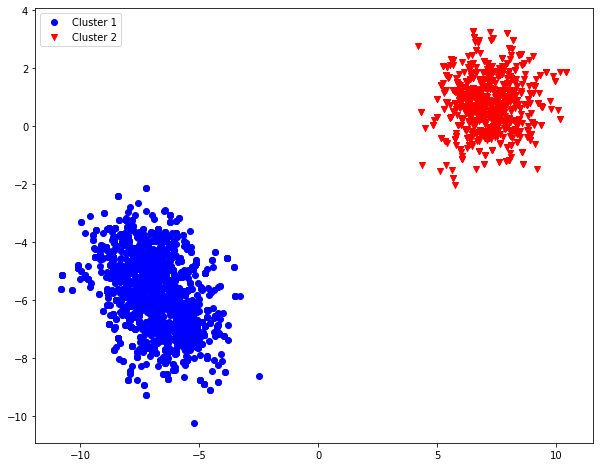

In [28]:
fig,ax=plt.subplots()
colors=['blue','red','green','yellow','orange','c','m','y','k']
marker=['o','v','1','^','s','p','+','D','X','P','2','H','3','d','4']
for i in range(K):
    name="Cluster "+str(i+1)
    ax.scatter(x_point[i],y_point[i],marker=marker[i],color=colors[i],label=name)
fig.set_figheight(8)
fig.set_figwidth(10)
legend.get_frame().set_facecolor('None')
ax.legend()
plt.show()